<img src="https://raw.githubusercontent.com/Harmonize-Brazil/code-gallery/main/img/INPE_logo.png" align="left" style="height: 105px" height="105"/>
<!-- https://www.gov.br/mcti/pt-br/composicao/rede-mcti/instituto-nacional-de-pesquisas-espaciais -->
<img src="https://earth.bsc.es/harmonize/lib/exe/fetch.php?h=250&crop=0&tok=cfb750&media=wiki:logo.png" align="right" style="height: 90px" height="90"/>

<h1 style="color:#336699; text-align: center">Module eclimpr (climate data)</h1>
<h3 style="color:#336699; text-align: center"><b>E</b>ODCtHRS <b>Clim</b>ate <b>Pr</b>ocessing Package</h3>
<hr style="border:2px solid #0077b9;">

<div style="text-align: center; font-size: 90%;">
    <a href="https://nbviewer.jupyter.org/github/Harmonize-Brazil/code-gallery/blob/main/jupyter/events/2025-Harmonize-Annual-Meeting/cube4health_climate_indicator_processing.ipynb"><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" ></a> <!--align="center"-->
    </br></br>
    Adeline Marinho Maciel <sup><a href="https://orcid.org/0000-0002-1467-6488" target="_blank" rel="noopener noreferrer"><img src="https://orcid.filecamp.com/static/thumbs/folders/qLJ1tuei4m6ugC3g.png" width="16" alt="ORCID iD" style="vertical-align: text-bottom;"/></a></sup>
    <br/><br/>
    Earth Observation and Geoinformatics Division, National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact:
    <a href="mailto:adeline.maciel@inpe.br">adelinemaciel22@gmail.com</a>
    <br/><br/>
    Last Update: November 14, 2025
    <br/><br/>
    <div style="width: 60%; margin: auto">
        <div style="text-align: center; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 10px;">
            This Jupyter Notebook presents an overview of the <b>E</b>ODCtHRS <b>Clim</b>ate  <b>Pr</b>ocessing (eclimpr) subpackage within the cube4health framework, designed to support the generation of climate indicators from satellite and reanalysis datasets. The module offers reproducible workflows for transforming raw climate data (NetCDF and GRIB2 formats) into standardized spatial products, including Cloud Optimized GeoTIFF (COG), Shapefile, and GeoJSON formats. These outputs enable both research and operational health-related applications. The workflows demonstrated include the processing of mean temperature indicator from CPTEC/INPE (SAMeT product), with spatial aggregation by municipalities and temporal aggregation by epidemiological weeks. This work aims to streamline climate data workflows, enabling scalable and interoperable analysis of environmental conditions and their impacts on health across Brazil. For deployment and integration details, refer to the cube4health (see <a href="https://harmonize-brazil.github.io/cube4health.html">documentation</a>).
        </div>
    </div>
</div>
<br/><br/>

## <span style="color:#336699" id="intr"> Introduction </span>
<hr style="border:1px solid #0077b9;">

This Jupyter Notebook illustrates how to generate **climate indicators from CPTEC/INPE and ERA5-Land/Copernicus** datasets. This example demonstrates how these climate data can be integrated into the Earth Observation Data Cubes tuned for Health Response platform (EODCtHRS) component to produce climate indicators, enabling a more comprehensive analysis of environmental impacts on public health in Brazil.

The <a href="https://github.com/Harmonize-Brazil/cube4health" target="_blank"><b>E</b>ODCtHRS <b>Clim</b>ate <b>Pr</b>ocessing (eclimpr)</a> is composed of a set of functions for reading files in NetCDF and GRIB2 formats, enabling spatial aggregations (e.g., grouping by municipalities) and temporal aggregations (e.g., epidemiological weeks and months).

As output, eclimpr generates files in both raster formats, in Cloud-Optimized GeoTIFF (COG), and vector formats, including GeoJSON and Shapefile. The input data includes daily aggregations of temperature, precipitation, relative humidity indicators derived from <a href="https://cds.climate.copernicus.eu/datasets/derived-era5-land-daily-statistics?tab=overview" target="_blank">ERA5-Land/Copernicus</a> (as pre-processed by **Raphael Saldanha**) and CPTEC/INPE.

<a href="#prococol_eclimpr">Figure 1</a> presents the data processing workflow.


<!-- https://www.base64-image.de/ -->
<figure style="text-align: center;">
  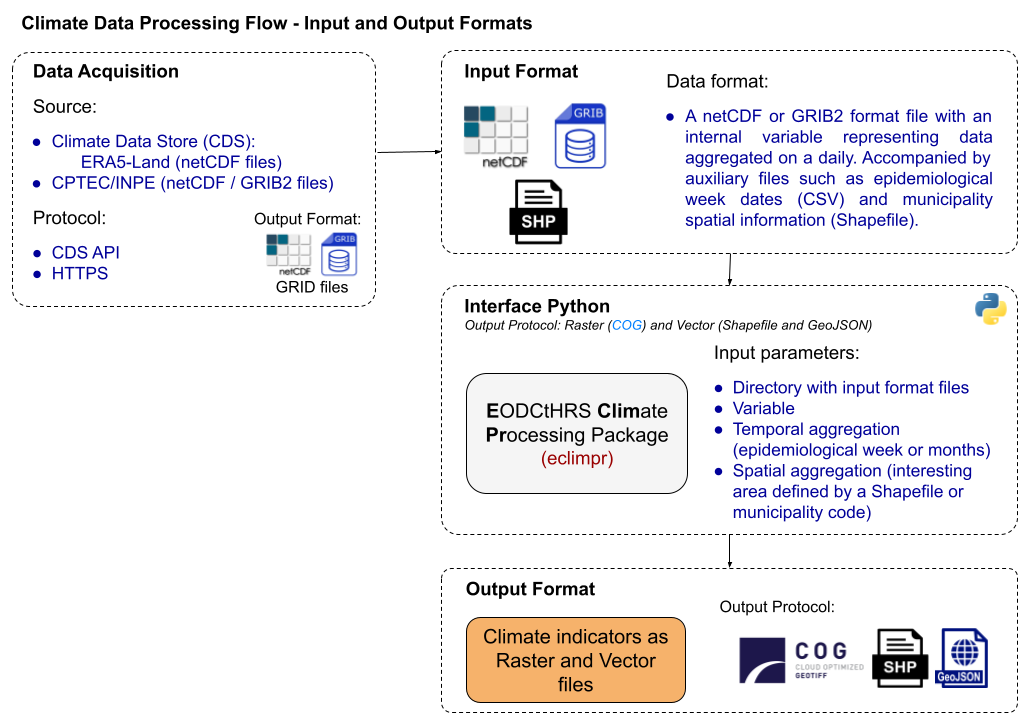
  <figcaption style='text-align: center;'><b>Figure 1</b> - Protocol climate data in eclimpr package.</figcaption>
</figure>

The climate indicators generated by the eclimpr module rely on three main satellite and reanalysis datasets: **ERA5-Land, SAMeT, and MERGE** (<a href="#providers_table"> Table 1</a>). Thus, the third collection of climate data is based on a dataset produced by <a href="https://rfsaldanha.github.io/data-projects/era5land-daily-latin-america.html" target="_blank">Raphael Saldanha</a>, who generated daily aggregates of selected ERA5-Land indicators for the Latin America region, in NetCDF format. For the Harmonize project, the selected data period covers from January 2010 to August 2025 for two regions of interest: Lower Tocantins River Basin (north) and Semi-arid areas of Campina Grande/Patos (northeast).

In addition to these data, the collection also includes indicators from the Center for Weather Forecast and Climate Studies (CPTEC/INPE), such as temperature from the <a href="https://ftp.cptec.inpe.br/modelos/tempo/SAMeT/" target="_blank">SAMeT</a> product and precipitation from the <a href="https://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/" target="_blank">MERGE</a> product, expanding the range of variables and ensuring a comprehensive climate characterization for the regions of interest. These datasets are harmonized within the cube4health framework to support spatial and temporal aggregation of climate indicators, enabling environmental health analyses. The list was defined by the team of Fiocruz experts involved in the project and serves as a reference for the set of indicators detailed below in <a href="#climate_indicators_table">Table 2</a>.

<table id="providers_table" align="center">
    <caption style="text-align"><b>Table 1</b> - Characteristics of Satellite Climate Datasets </caption>
    <tr style="background-color: #4e4d4dff; border-radius: 1em/5em;  font-size: 16px; color: white;">
      <th>Dataset</th>
      <th>Spatial Resolution</th>
      <th>Temporal Coverage</th>
      <th>Institution</th>
      <th>Official Site</th>
      <th>Scientific Reference</th>
    </tr>
  </thead>
  <tbody>
    <tr style="text-align: center; font-size: 16px;">
      <td>ERA5-Land</td>
      <td>~9 km (0.1° x 0.1°)</td>
      <td>1950 – Present</td>
      <td>ECMWF / Copernicus</td>
      <td><a href="https://cds.climate.copernicus.eu/datasets/reanalysis-era5-land?tab=overview">ERA5-Land Dataset</a></td>
      <td><a href="https://essd.copernicus.org/articles/13/4349/2021/" target="_blank">Muñoz-Sabater et al., 2021</a></td>
    </tr>
    <tr style="text-align: center; background-color: #D8D8D8; font-size: 16px; color: #000;">
      <td>SAMeT</td>
      <td>~10 km (altitude-adjusted)</td>
      <td>Daily, since 2000</td>
      <td>CPTEC / INPE</td>
      <td><a href="https://ftp.cptec.inpe.br/modelos/tempo/SAMeT/" target="_blank">SAMeT FTP</a></td>
      <td><a href="https://ftp.cptec.inpe.br/modelos/tempo/SAMeT/Rozante_et_al_2021.pdf" target="_blank">Rozante et al., 2021</a></td>
    </tr>
    <tr style="text-align: center; font-size: 16px;">
      <td>MERGE</td>
      <td>10 km</td>
      <td>Daily, since 2000</td>
      <td>CPTEC / INPE</td>
      <td><a href="https://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/">MERGE FTP</a></td>
      <td><a href="https://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/Rozante_et.al.2010.pdf">Rozante et al., 2010</a></td>
    </tr>
  </tbody>
</table>


<table id="climate_indicators_table" align="center">
    <caption style="text-align"><b>Table 2</b> - List of climate indicators </caption>
    <tr style="background-color: #4e4d4dff; border-radius: 1em/5em;  font-size: 16px; color: white;">
        <th>Indicator description (unit)</th>
        <th>Aggregation Temporal / Spatial</th>
        <th>Period / Frequency</th>
        <th>Data source</th>
    </tr>
    </thead>
    <tbody>
        <tr>
            <td <p style="text-align: center; font-size: 16px;">
                <b>Temperature</b> values for maximum, minimum and mean in Celsius (°C) (converts temperature values from Kelvin to Celsius using the transformation value - 273.15)
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                Northeast and North hotspots <br> Aggregated by municipality
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                January/2010 - August/2025 <br> by epidemiological week and months
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                ERA5-Land (Raphael Saldanha <a href="https://rfsaldanha.github.io/data-projects/era5land-daily-latin-america.html" target="_blank">ERA5-Land - daily aggregates for Latin America</a> - indicator <i>2m temperature</i>)
            </td>
        </tr>
        <tr style="background-color: #D8D8D8; font-size: 16px; color: #000;">
            <td <p style="text-align: center; font-size: 16px;">
                <b>Precipitation</b> values for maximum, minimum and mean rainfall accumulation, measured in millimeters (mm) (converts values from meters to millimeters using the transformation value * 1000)
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                Northeast and North hotspots <br> Aggregated by municipality
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                January/2010 - August/2025 <br> by epidemiological week and months
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                ERA5-Land (Raphael Saldanha <a href="https://rfsaldanha.github.io/data-projects/era5land-daily-latin-america.html" target="_blank">ERA5-Land - daily aggregates for Latin America</a> - indicator <i>total precipitation</i>)
            </td>
        </tr>
        <tr>
            <td <p style="text-align: center; font-size: 16px;">
                <b>Relative Humidity (%)</b> calculated from ERA5-Land data using 2m temperature and 2m dewpoint temperature.
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                Northeast and North hotspots <br> Aggregated by municipality
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                January/2010 - August/2025 <br> by epidemiological week and months
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                ERA5-Land (Raphael Saldanha <a href="https://rfsaldanha.github.io/data-projects/era5land-daily-latin-america.html" target="_blank">ERA5-Land - daily aggregates for Latin America</a> - indicator <i>2m temperature</i> and <i>2m dewpoint temperature</i>)
            </td>
        </tr>
        <tr style="background-color: #D8D8D8; font-size: 16px; color: #000;">
            <td <p style="text-align: center; font-size: 16px;">
                <b>Maximum temperature anomaly</b> (in number of consecutive days)
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                Northeast and North hotspots <br> Aggregated by municipality
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                January/2010 - August/2025 <br> by epidemiological week and months
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                Maximum Temperature of the Climatological Normal - Period: 1991-2020, (<a href="https://portal.inmet.gov.br/normais" target="_blank">INMET</a>) and ERA5-Land (Raphael Saldanha <a href="https://rfsaldanha.github.io/data-projects/era5land-daily-latin-america.html" target="_blank">ERA5-Land - daily aggregates for Latin America</a> - indicator <i>2m temperature</i>)
            </td>
        </tr>
        <tr>
            <td <p style="text-align: center; font-size: 16px;">
                <b>Temperature</b> values for maximum, minimum and mean in Celsius (°C) from SAMeT product CPTEC/INPE.
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                Northeast and North hotspots <br> Aggregated by municipality
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                January/2010 - August/2025 <br> by epidemiological week and months
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                Daily data from <a href="https://ftp.cptec.inpe.br/modelos/tempo/SAMeT/" target="_blank">SAMeT - CPTEC/INPE</a>
            </td>
        </tr>
        <tr style="background-color: #D8D8D8; font-size: 16px; color: #000;">
            <td <p style="text-align: center; font-size: 16px;">
                <b>Precipitation</b> values for maximum, minimum and mean rainfall accumulation, measured in millimeters (mm) from MERGE product CPTEC/INPE.
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                Northeast and North hotspots <br> Aggregated by municipality
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                January/2010 - August/2025 <br> by epidemiological week and months
            </td>
            <td <p style="text-align: center; font-size: 16px;">
                Daily data from <a href="https://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/" target="_blank">MERGE - CPTEC/INPE</a>
            </td>
        </tr>
    </tbody>
</table>


## <span style="color:#336699" id="install"> Example of using eclimpr to generate climate indicator </span>
<hr style="border:1px solid #0077b9;">

The indicator used in this example represents the mean regional temperature derived from SAMeT data provided by CPTEC/INPE. The notebook demonstrates how to process a NetCDF file to generate municipal and monthly outputs in both vector formats (GeoJSON and Shapefile) and raster format (COG). The structure of the example package is outlined below:

<ol>
    <li> <a href="#load" style="font-size: 16px;">Load cube4health Python Package</a>
    <li> <a href="#input" style="font-size: 16px;">Input datasets</a>
    <ol style='list-style-type: none;'>
        <li> 
            <a href="#images" style="font-size: 16px;">
                <span style="color:#fff">2.1.</span> Climate dataset
            </a>
        <li> <a href="#roi" style="font-size: 16px;"><span style="color:#fff">2.2.</span> Region of interesting (roi)</a>
    </ol>
    <li> <a href="#execute" style="font-size: 16px;">Generate temperature indicator</a>
    <li> <a href="#results" style="font-size: 16px;">Plot results</a>
    <li> <a href="#references" style="font-size: 16px;">References</a>
</ol>

### <span style="color:#336699" id="load">1. Load cube4health Python Package </span>
 </span>
<hr style="border:1px solid #0077b9;">

To run the examples in this Jupyter Notebook, follow the installation instructions provided in the <a href="https://github.com/Harmonize-Brazil/code-gallery/blob/main/jupyter/events/2025-Harmonize-Annual-Meeting/cube4health_introduction.ipynb" target="_blank">cube4health_introduction.ipynb</a> notebook. The cube4health package includes the eclimpr module. Use the following command to check your installation:

In [ ]:
# Check and install cube4health if necessary
try:
    import cube4health
except ImportError:
    print("Must be installed!")

print(cube4health.__file__)

In [ ]:
%cd ~

In [ ]:
%cd /home/jovyan/code-gallery/jupyter/events/2025-Harmonize-Annual-Meeting/

Installing additional libraries for processing and visualization:

### <span style="color:#336699" id="download"> 2. Input datasets </span>
 </span>
<hr style="border:1px solid #0077b9;">

To process a climate indicator using the eclimpr module, two main inputs are required: the climate data files themselves, provided in NetCDF or GRIB format, and a region of interest (ROI) that defines the spatial extent for which the indicators will be generated.

#### <span style="color:#336699" id="images"> 2.1 Climate dataset</span>
 </span>
<hr style="border:1px solid #0077b9;">

For training purposes, instead of downloading data from <a href="#CPTEC/INPE">CPTEC/INPE</a> or other sources, the mean temperature datasets (daily aggregates from the SAMeT product) are already available locally at `climate_dataset/temperature` for the months of March and April 2025:

Example of the files into the specified directory, showing the daily NetCDF mean temperature products retrieved from the CPTEC/INPE SAMeT dataset.

In [ ]:
%ls climate_dataset/temperature/

Using <b>gdalinfo</b>, it is possible to inspect the file metadata, including the image properties and the specific variable name `tmed` that must be defined in the next processing steps.

In [ ]:
!gdalinfo climate_dataset/temperature/SAMeT_CPTEC_TMED_20250301.nc

#### <span style="color:#336699" id="roi"> 2.2. Create a region of interesting (roi)</span>
 </span>
<hr style="border:1px solid #0077b9;">

Before proceeding to the climate indicator generation step, it must provide a region of interest (roi) for which the indicators will be produced. The eclimpr module offers two options. The first is to supply a user-provided shapefile and map its column names according to the requirements of the function. The second option is to specify a municipality code following the official IBGE identifier scheme.

### Providing your own shapefile.

In this case, set `own_shapefile=True` and supply the path to the file using shapefile_path. You must also provide a mapping of the attribute names in the original shapefile to the standardized names expected by the function through the `list_columns` argument. This mapping must include the keys `{"code_muni", "name_muni", "uf_state", "geometry"}` so that the data can be properly standardized. 

The function will then process the file, transform the geometry to EPSG:4326, rename the attributes, and save a processed version in the specified directory (<a href="#parameters_shp">Table 4</a>).

<table id="parameters_shp" align="center" width="100%">
    <caption style="text-align:center"><b>Table 4</b> - Parameters for <b>processed_shapefile</b> function</caption>
    <tr style="background-color: #4e4d4dff; border-radius: 1em/5em; font-size: 16px; color: white;">
        <th style="text-align: center;" width="15%">Parameter</th>
        <th style="text-align: center;" width="75%">Description</th>
        <th style="text-align: center;" width="10%">Required</th>
    </tr>
    <tr>
        <td><p style="text-align: center; font-size: 16px;">main_dir</p></td>
        <td><p style="text-align: center; font-size: 16px;">Directory where the processed shapefile will be stored.</p></td>
        <td><p style="text-align: center; font-size: 16px;">Yes</p></td>
    </tr>
    <tr style="background-color: #D8D8D8; color: #000;">
        <td><p style="text-align: center; font-size: 16px;">own_shapefile</p></td>
        <td><p style="text-align: center; font-size: 16px;">If False, data is loaded from geobr (default). If True, a user-provided shapefile is used.</p></td>
        <td><p style="text-align: center; font-size: 16px;">No</p></td>
    </tr>
    <tr>
        <td><p style="text-align: center; font-size: 16px;">shapefile_path</p></td>
        <td><p style="text-align: center; font-size: 16px;">Path to the user-provided shapefile (required when own_shapefile=True).</p></td>
        <td><p style="text-align: center; font-size: 16px;">Conditional</p></td>
    </tr>
    <tr style="background-color: #D8D8D8; color: #000;">
        <td><p style="text-align: center; font-size: 16px;">list_columns</p></td>
        <td><p style="text-align: center; font-size: 16px;">Mapping of column names in the user-provided shapefile to the expected ones. Must include the keys {"code_muni","name_muni","uf_state","geometry"}. Example: {"code_muni": "CD_MUN", "name_muni": "NM_MUN", "uf_state": "SIGLA", "geometry": "geometry"}.</p></td>
        <td><p style="text-align: center; font-size: 16px;">Conditional</p></td>
    </tr>
    <tr>
        <td><p style="text-align: center; font-size: 16px;">cod_mun</p></td>
        <td><p style="text-align: center; font-size: 16px;">7-digit IBGE municipality code (used when loading a single municipality from geobr). Required if own_shapefile=False and geobr_scope="municipality".</p></td>
        <td><p style="text-align: center; font-size: 16px;">Conditional</p></td>
    </tr>
    <tr style="background-color: #D8D8D8; color: #000;">
        <td><p style="text-align: center; font-size: 16px;">uf_name</p></td>
        <td><p style="text-align: center; font-size: 16px;">Two-letter state code (e.g., "RJ", "RN"). Required when own_shapefile=False and geobr_scope="state".</p></td>
        <td><p style="text-align: center; font-size: 16px;">Conditional</p></td>
    </tr>
    <tr>
        <td><p style="text-align: center; font-size: 16px;">geobr_scope</p></td>
        <td><p style="text-align: center; font-size: 16px;">Scope for geobr download. Use "municipality" to load a single municipality by code, or "state" to load all municipalities of a state. Default is "municipality".</p></td>
        <td><p style="text-align: center; font-size: 16px;">No</p></td>
    </tr>
    <tr style="background-color: #D8D8D8; color: #000;">
        <td><p style="text-align: center; font-size: 16px;">geobr_year</p></td>
        <td><p style="text-align: center; font-size: 16px;">Reference year for geobr data. Default is 2022.</p></td>
        <td><p style="text-align: center; font-size: 16px;">No</p></td>
    </tr>
</table>


As follows, the original shapefile without modification. It is possible to see the features that will be mapped.

In [ ]:
%pwd

In [ ]:
import geopandas as gpd

# Load shapefile
gdf = gpd.read_file("climate_dataset/mun_indireto_PA.shp")

# Print first 4 rows
gdf.head(4)

Now, we use the function `processed_shapefile`, which provides a new Shapefile and ensures a standardized format with four attributes: ``cod_mun`` (municipality code), ``name_mun`` (municipality name), ``uf_mun`` (state code), and ``geometry`` (EPSG:4326):

In [ ]:
from cube4health.eclimpr.process_shapefile import processed_shapefile

In [ ]:
# As a dictionary
mapping = {
    "code_muni": "CD_MUN",
    "name_muni": "NM_MUN",
    "uf_state": "SIGLA",
    "geometry": "geometry"
}

# From shapefile provided by user
processed_shapefile(
    main_dir="climate_dataset/",
    own_shapefile=True,
    shapefile_path="climate_dataset/mun_indireto_PA.shp", # original shapefile path
    list_columns=mapping
)


The roi directory now contains the newly processed shapefile called `mun_indireto_PA_processed`, updated with the standardized columns `cod_mun`, `name_mun`, `uf_mun`, and `geometry` in EPSG:4326.

![Output: shp_output](https://raw.githubusercontent.com/Harmonize-Brazil/code-gallery/climate/jupyter/events/2025-Preview-Harmonize-Training/figures/roi_output.png)

### Shapefile directly from the geobr package.

When `own_shapefile=False`, the area of interest is obtained automatically from geobr. Two scopes are supported.

If `geobr_scope="municipality"`, you must provide a 7-digit IBGE municipality code through the cod_mun parameter, and only that municipality will be loaded.

If `geobr_scope="state"`, you must provide the state’s two-letter code using uf_name, and the function will load all municipalities of that state for the chosen reference year.

In both cases, the data are standardized to the same four attributes (cod_mun, name_mun, uf_mun, geometry) and transformed to EPSG:4326, ensuring consistency with the subsequent climate indicator processing workflow.

In [ ]:
# From geobr package Python by state
processed_shapefile(main_dir="climate_dataset/",
                    own_shapefile=False,
                    geobr_scope = "state",
                    uf_name="SE") # Sergipe-SE, Brazil

The roi directory now contains the newly processed shapefile called `geobr_SE_processed`, updated with the standardized columns `cod_mun`, `name_mun`, `uf_mun`, and `geometry` in EPSG:4326.

![Output: shp_output](https://raw.githubusercontent.com/Harmonize-Brazil/code-gallery/climate/jupyter/events/2025-Preview-Harmonize-Training/figures/roi_geobr_output.png)

### <span style="color:#336699" id="execute"> 3. Generate temperature indicator </span>
 </span>
<hr style="border:1px solid #0077b9;">

In this example, we will use the TMED data from SAMeT. We will perform spatial aggregation by municipality and temporal aggregation by epidemiological week for the regions of interest (ROI) of the HARMONIZE Project in Brazil — North region. To do this, it is necessary to specify each parameter and execute the function `process_climate_indicator`.

Before running the `process_climate_indicator` function, it is necessary to define the parameters that control the data processing workflow. These parameters determine the input and output directories, the variable to be processed, the region of interest shapefile, and the temporal configuration used for aggregation. <a href="#parameters_indicator">Table 5</a> summarizes all the parameters required to execute the function properly, including their descriptions, accepted values, and whether they are required.

<table id="parameters_indicator" align="center" width="100%">
    <caption style="text-align"><b>Table 5</b> - Parameter for <b>process_climate_indicator</b> function of eclimpr package.</caption>
    <tr style="background-color: #4e4d4dff; border-radius: 1em/5em;  font-size: 16px; color: white;">
        <th style="text-align: center;" width="15%"> Parameter
        <th style="text-align: center;" width="75%"> Description
        <th style="text-align: center;" width="10%"> Required
    </tr>
        <td> <p style="text-align: center; font-size: 16px;"> type_indicator </p>
        <td> <p style="text-align: center; font-size: 16px;"> This is a string and informs the type of indicator will be processed.  Can be: "temp_era5land", "precip_era5land", "anomaly_era5land", "humidity_era5land", "temp_cptec", "precip_cptec". Default is "temp_era5land". </p>
        <td> <p style="text-align: center; font-size: 16px;"> Yes </p>
    </tr>
    <tr>
    <tr style="background-color: #D8D8D8; color: #000;">
        <td> <p style="text-align: center; font-size: 16px;"> spatial_aggregation </p>
        <td> <p style="text-align: center; font-size: 16px;"> This is a string and indicates the temporal aggregation unit. Default is "epiweek". The list: "epiweek", "month" </p>
        <td> <p style="text-align: center; font-size: 16px;"> Yes </p>
    </tr>
        <td> <p style="text-align: center; font-size: 16px;"> main_dir </p>
        <td> <p style="text-align: center; font-size: 16px;"> This is a string and informs the directory path where the files NetCDF, .nc, are stored. </p>
        <td> <p style="text-align: center; font-size: 16px;"> Yes </p>
    </tr>
    <tr style="background-color: #D8D8D8; color: #000;">
        <td> <p style="text-align: center; font-size: 16px;"> output_dir </p>
        <td> <p style="text-align: center; font-size: 16px;"> This is a string and informs the directory where the indicators generated will be stored. </p>
        <td> <p style="text-align: center; font-size: 16px;"> Yes </p>
    </tr>
    <tr>
        <td> <p style="text-align: center; font-size: 16px;"> folder_name </p>
        <td> <p style="text-align: center; font-size: 16px;"> This is a string and indicates the new name of the folder that will be created where the downloaded data will be stored. </p>
        <td> <p style="text-align: center; font-size: 16px;"> Yes </p>
    </tr>
    <tr style="background-color: #D8D8D8; color: #000;">
        <td> <p style="text-align: center; font-size: 16px;"> shapefile_path </p>
        <td> <p style="text-align: center; font-size: 16px;"> This is the Regions of Interest (ROI) with the path with Shapefile of the interesting area. </p>
        <td> <p style="text-align: center; font-size: 16px;"> Yes </p>
    </tr>
    <tr>
        <td> <p style="text-align: center; font-size: 16px;"> variable_name </p>
        <td> <p style="text-align: center; font-size: 16px;"> This is the variable name NetCDF file. The parameter needs to be known beforehan. </p>
        <td> <p style="text-align: center; font-size: 16px;"> Yes </p>
    </tr>
    <tr style="background-color: #D8D8D8; color: #000;">
        <td> <p style="text-align: center; font-size: 16px;"> years </p>
        <td> <p style="text-align: center; font-size: 16px;">  This is a list or unique values, YEAR, that user want to generate indicators from data. In this case, only NetCDF files with this date will be processed, for instance, [2019, 2020, 2021] or [2022]. </p>
        <td> <p style="text-align: center; font-size: 16px;"> Yes </p>
    </tr>
    <tr>
        <td> <p style="text-align: center; font-size: 16px;"> indicator_name </p>
        <td> <p style="text-align: center; font-size: 16px;"> This is the indicator name to add in output files (max 20 characters). Example: temp for temperature, precip for precipitation. Default is "temp", "precip", "anomaly" and "humidity"  </p>
        <td> <p style="text-align: center; font-size: 16px;"> No </p>
    </tr>
    <tr style="background-color: #D8D8D8; color: #000;">
        <td> <p style="text-align: center; font-size: 16px;"> color_png_file </p>
        <td> <p style="text-align: center; font-size: 16px;">  This is a string and informs a .TXT file containing columns with value ranges and an RGB color column to be used in the PNG generation process of the package. </p>
        <td> <p style="text-align: center; font-size: 16px;"> No </p>
    </tr>
        <tr>
        <td> <p style="text-align: center; font-size: 16px;"> aggregation_type </p>
        <td> <p style="text-align: center; font-size: 16px;"> This is the list of aggregations to compute ("max", "min", "mean", or "all"). Default is "all". </p>
        <td> <p style="text-align: center; font-size: 16px;"> Yes </p>
    </tr>
    <tr style="background-color: #D8D8D8; color: #000;">
        <td> <p style="text-align: center; font-size: 16px;"> provide_interval </p>
        <td> <p style="text-align: center; font-size: 16px;">  If True, allows the user to provide a custom interval file. Default is False. </p>
        <td> <p style="text-align: center; font-size: 16px;"> Yes </p>
    </tr>
    <tr>
        <td> <p style="text-align: center; font-size: 16px;"> interval_file_path </p>
        <td> <p style="text-align: center; font-size: 16px;"> This is the path to the custom interval file in TXT format, if provide_interval is True. Default is None. Case use a a temporal agregation different of epidemiological week. :<br> 
        <br>Year,WeekNumber,StartDate,EndDate
        <br>2018,01,31/12/2017,06/01/2018
        <br>2018,02,07/01/2018,13/01/2018
        <td> <p style="text-align: center; font-size: 16px;"> No </p>
    </tr>
</table>

To process a temperature indicator from SAMeT/INPE uses `process_climate_indicator` function, as follows:

### Generate indicators by epidemiological weeks.

The ``process_climate_indicator`` function can be used to generate the climate indicator by a roi. This will return the data in a set of folder with the `<name indicator>_<statistical aggregation>_<study area>_<spatial aggregation>_<temporal aggregation>_<provider>`, as example `temp_mean_NO_mun_epiweek_cptec`.


In this case, to generate indicators by epidemiological weeks instead of by month, you only need to define the parameter `spatial_aggregation` to `epiweek`. 

In [ ]:
from cube4health.eclimpr.process_climate_indicator import process_climate_indicator

In [ ]:
maindir = "climate_dataset/temperature"
outputdir = "climate_dataset"
roi = "climate_dataset/mun_indireto_PA_processed.shp"

In [ ]:
# Temperature by epidemiological weeks
process_climate_indicator(
    type_indicator = "temp_cptec", 
    spatial_aggregation = "epiweek", 
    main_dir = maindir,
    output_dir= outputdir,
    folder_name = "NO",
    shapefile_path = roi,
    variable_name = "tmed",
    years = [2025], 
    aggregation_type= ["mean"]
)

After running the function with the spatial aggregation set to epidemiological weeks, the full set of weekly climate indicators was generated. The output directory now includes, for each epidemiological week processed, all resulting files: the municipality-level shapefiles with aggregated values, their compressed versions, the corresponding GeoJSON files, and the PNG and GeoTIFF (COG) images produced for visualization and distribution.

![Output: climate_epiweek1](https://raw.githubusercontent.com/Harmonize-Brazil/code-gallery/climate/jupyter/events/2025-Preview-Harmonize-Training/figures/climate_output_epiweek1.png)

![Output: climate_epiweek2](https://raw.githubusercontent.com/Harmonize-Brazil/code-gallery/climate/jupyter/events/2025-Preview-Harmonize-Training/figures/climate_output_epiweek2.png)

Among the improvements introduced in this version, the standardization of attribute names for geometric features in Shapefile and GeoJSON files (for both health and climate data) stands out. This initiative was motivated by the feedback provided during the training held in June, which highlighted the lack of uniformity in attribute naming across datasets.

The new naming convention adopts clear and intuitive terms in English, facilitating data integration and analysis across different systems and research teams. <a href="#vector_attributes_standard">Table 6</a> summarizes the standardized attribute names now applied to all vector data layers related to health and climate indicators.

<table id="vector_attributes_standard" align="center" width="100%">
    <caption style="text-align:center"><b>Table 6</b> - Standardized attribute names for vector data (Shapefile and GeoJSON)</caption>
    <tr style="background-color: #4e4d4dff; border-radius: 1em/5em;  font-size: 16px; color: white;">
        <th style="text-align: center;" width="20%">Attribute</th>
        <th style="text-align: center;" width="80%">Description</th>
    </tr>
    <tr>
        <td style="text-align: center; font-size: 16px">cod_mun</td>
        <td style="text-align: center; font-size: 16px">Municipality code according to IBGE (7-digit code, where the first two digits represent the state code).</td>
    </tr>
    <tr style="background-color: #D8D8D8; color: #000">
        <td style="text-align: center; font-size: 16px">name_mun</td>
        <td style="text-align: center; font-size: 16px">Full name of the municipality.</td>
    </tr>
    <tr>
        <td style="text-align: center; font-size: 16px">uf_mun</td>
        <td style="text-align: center; font-size: 16px">Abbreviation of the federal unit (state) to which the municipality belongs.</td>
    </tr>
    <tr style="background-color: #D8D8D8; color: #000">
        <td style="text-align: center; font-size: 16px">data_source</td>
        <td style="text-align: center; font-size: 16px">Name of the data provider or source (e.g., SAMeT, CPTEC, ERA5-Land).</td>
    </tr>
    <tr>
        <td style="text-align: center; font-size: 16px">name_indicator</td>
        <td style="text-align: center; font-size: 16px">Name of the indicator represented in the dataset (e.g., temperature, precipitation, humidity, anomaly).</td>
    </tr>
    <tr style="background-color: #D8D8D8; color: #000">
        <td style="text-align: center; font-size: 16px">epiweek_number / month_number</td>
        <td style="text-align: center; font-size: 16px">Epidemiological week number (for weekly aggregation) or month number (for monthly aggregation).</td>
    </tr>
    <tr>
        <td style="text-align: center; font-size: 16px">epiweek_start_date / month_start_date</td>
        <td style="text-align: center; font-size: 16px">Start date of the epidemiological week or first day of the month corresponding to the data record.</td>
    </tr>
    <tr style="background-color: #D8D8D8; color: #000">
        <td style="text-align: center; font-size: 16px">time_agg</td>
        <td style="text-align: center; font-size: 16px">Temporal aggregation type (e.g., epidemiological week or month).</td>
    </tr>
    <tr>
        <td style="text-align: center; font-size: 16px">spatial_agg</td>
        <td style="text-align: center; font-size: 16px">Spatial aggregation unit (e.g., municipality).</td>
    </tr>
    <tr style="background-color: #D8D8D8; color: #000">
        <td style="text-align: center; font-size: 16px">value</td>
        <td style="text-align: center; font-size: 16px">Indicator value, expressed in °C (temperature), mm (precipitation), % (relative humidity), or number of consecutive days (temperature anomaly).</td>
    </tr>
    <tr>
        <td style="text-align: center; font-size: 16px">geom</td>
        <td style="text-align: center; font-size: 16px">Geometry column used in spatial databases (e.g., PostGIS) or geospatial libraries (e.g., GeoPandas).</td>
    </tr>
</table>

Note: In the Shapefile (.shp) format, the attribute names are limited to a maximum of 10 characters due to the dBase (.dbf) file structure. For this reason, some field names are shortened to ensure compatibility (for example, data_source becomes datasource, and name_indicator becomes indicator). This convention guarantees that the files can be correctly read by GIS software such as QGIS, GeoServer, and PostGIS.

In [ ]:
# From Shapefile (.shp)
import geopandas as gpd

# Load shapefile
gdf = gpd.read_file("climate_dataset/output_climate_dir/temp_mean_NO_mun_epiweek_cptec/shapefiles/2025-04-13/temp_mean_NO_mun_epiweek_20250413_20250419.shp")

# Print first 4 rows
gdf.head(4)

In [ ]:
# From GeoJSON
import geopandas as gpd

# Load shapefile
gdf = gpd.read_file("climate_dataset/output_climate_dir/temp_mean_NO_mun_epiweek_cptec/shapefiles/2025-03-09/temp_mean_NO_mun_epiweek_20250309_20250315.geojson")

# Print first 4 rows
gdf.head(4)

### <span id="results" style="color:#336699">4. Plot results</span>
<hr style="border:1px solid #0077b9;">

It is possible to plot the data of the dataset with the plot method. To images:

In [ ]:
import folium
import rasterio
import numpy as np
import os
from matplotlib.colors import LinearSegmentedColormap
import geopandas as gpd
from branca.colormap import LinearColormap

# Path to input TIF files
path_tifs = "climate_dataset/output_climate_dir/temp_mean_NO_mun_epiweek_cptec/images"

# Path to ROI shapefile
roi = "climate_dataset/mun_indireto_PA_processed.shp"

# Create base map 
m = folium.Map(location=[-2.242, -49.497], zoom_start=7)

# Color ramp used for the raster visualisation
colors = ["#08306B", "#2E8B57", "#FFFF00", "#FFA500", "#B22222"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

# Compute global min/max values (colors bar)
all_values = []

for fname in sorted(os.listdir(path_tifs)):
    if fname.lower().endswith(".tif"):
        tif_path = os.path.join(path_tifs, fname)
        with rasterio.open(tif_path) as src:
            data = src.read(1).astype(float)
            data = data[data != -9999]
            if len(data) > 0:
                all_values.append(np.nanmin(data))
                all_values.append(np.nanmax(data))

global_min = min(all_values)
global_max = max(all_values)

# Generate maps with local normalisation, but with a fixed global legend.
for i, fname in enumerate(sorted(os.listdir(path_tifs))):
    if fname.lower().endswith(".tif"):
        tif_path = os.path.join(path_tifs, fname)

        with rasterio.open(tif_path) as src:
            bounds = src.bounds
            data = src.read(1).astype(float)

            data[data == -9999] = np.nan

            # Local normalisation 
            local_min = np.nanmin(data)
            local_max = np.nanmax(data)

            arr = np.nan_to_num(data, nan=local_min)

            norm = (arr - local_min) / (local_max - local_min + 1e-9)

            rgba = cmap(norm)
            rgba[np.isnan(data)] = (0, 0, 0, 0)

            rgb = (rgba[:, :, :3] * 255).astype(np.uint8)

        folium.raster_layers.ImageOverlay(
            image=rgb,
            bounds=[[bounds.bottom, bounds.left], [bounds.top, bounds.right]],
            name=fname,
            opacity=0.8,
            show=(i == 1),
        ).add_to(m)

# ROI shapefile
gdf = gpd.read_file(roi)

folium.GeoJson(
    gdf,
    name="ROI",
    style_function=lambda x: {"color": "black", "weight": 2, "fillOpacity": 0}
).add_to(m)

# Legend using global_min and global_max
legend = LinearColormap(
    colors=colors,
    vmin=global_min,
    vmax=global_max
).to_step(10)

legend.caption = "Temperature (°C)"
legend.add_to(m)

folium.LayerControl().add_to(m)

m

To geojson files:

In [ ]:
import folium
import glob
import os
import numpy as np
import json
from branca.colormap import LinearColormap

# Paths
path_geojson_root = "climate_dataset/output_climate_dir/temp_mean_NO_mun_epiweek_cptec/shapefiles"
files = sorted(glob.glob(os.path.join(path_geojson_root, "**", "*.geojson"), recursive=True))

if not files:
    raise FileNotFoundError(f"No GeoJSON files under: {path_geojson_root}")

# Color scale (same as raster)
colors = ["#08306B", "#2E8B57", "#FFFF00", "#FFA500", "#B22222"]

# Compute global min/max values from all GeoJSON files
all_values = []
for geojson_path in files:
    with open(geojson_path, "r") as f:
        data = json.load(f)
        for feat in data["features"]:
            val = feat["properties"].get("value")
            if val is not None and val != -9999:
                all_values.append(float(val))

global_min = min(all_values)
global_max = max(all_values)

# Continuous colormap
cmap = LinearColormap(
    colors=colors,
    vmin=global_min,
    vmax=global_max
).to_step(10)

# Initialize folium map
m = folium.Map(location=[-2.242, -49.497], zoom_start=7)

# Multi-layer setup: one layer per GeoJSON file
for i, geojson_path in enumerate(files):
    layer_name = os.path.basename(geojson_path).replace(".geojson", "")

    with open(geojson_path, "r") as f:
        data = json.load(f)

    # Styling function using continuous colormap
    def style_fn(feature):
        val = feature["properties"].get("value")

        # Transparent for nodata
        if val is None or val == -9999:
            return {
                "fillColor": "#000000",
                "color": "#333",
                "weight": 0.2,
                "fillOpacity": 0
            }

        val = float(val)
        return {
            "fillColor": cmap(val),
            "color": "#333",
            "weight": 0.2,
            "fillOpacity": 0.7
        }

    # Each GeoJSON gets its own overlay group
    g = folium.FeatureGroup(name=layer_name, show=(i == 0))
    folium.GeoJson(
        data,
        style_function=style_fn,
        tooltip=folium.GeoJsonTooltip(
            fields=["name_mun", "value"],
            aliases=["Municipality:", "Temperature (°C)"],
            localize=True,
        ),
    ).add_to(g)

    g.add_to(m)

# Legend
cmap.caption = "Temperature (°C)"
cmap.add_to(m)

# Layer control
folium.LayerControl().add_to(m)

# JavaScript: allow only one overlay active at a time
exclusive_js = """
<script>
document.addEventListener('DOMContentLoaded', function() {
    var checkboxes = document.querySelectorAll(
        '.leaflet-control-layers-overlays .leaflet-control-layers-selector'
    );
    checkboxes.forEach(function(cb) {
        cb.addEventListener('change', function() {
            if (this.checked) {
                checkboxes.forEach(function(other) {
                    if (other !== cb && other.checked) {
                        other.checked = false;
                        other.dispatchEvent(new Event('click'));
                    }
                });
            }
        });
    });
});
</script>
"""

m.get_root().html.add_child(folium.Element(exclusive_js))

# Display final map
m


### Docstring of function with description.

In [ ]:
help(cube4health.eclimpr.process_climate_indicator)

### <span id="references" style="color:#336699">5. References</span>
<hr style="border:1px solid #0077b9;">

<a id="FERREIRA2020"></a>
* *Ferreira, K. R. et al.* Earth observation data cubes for Brazil: Requirements, methodology and products. Remote Sensing, 12(24), 2020. ISSN 2072-4292. doi: 10.3390/rs12244033. URL <a href=https://www.mdpi.com/2072-4292/12/24/4033>https://www.mdpi.com/2072-4292/12/24/4033</a>.
  
<a id="MACIEL2023"></a>
* *Maciel, A. M. et al.* The HARMONIZE Project and the EODCtHRS Architecture: An Earth Observation Data Cube tuned for Health Response Systems. XXIV Brazilian Symposium on Geoinformatics. Anais...São José dos Campos: 2023. URL <a href=http://urlib.net/ibi/8JMKD3MGPDW34P/4ADBNKB>http://urlib.net/ibi/8JMKD3MGPDW34P/4ADBNKB</a>.

<a id="MUNOZ2021"></a>
* *Muñoz-Sabater, J. et al.* ERA5-Land: a state-of-the-art global reanalysis dataset for land applications.Earth Syst. Sci. Data, 13, 4349–4383, 2021. URL <a href=https://doi.org/10.5194/essd-13-4349-2021>https://doi.org/10.5194/essd-13-4349-2021</a>.

<a id="ROZANTE2010"></a>
* *Rozante, J. R. et al.* Combining TRMM and Surface Observations of Precipitation: Technique and Validation over South America. 
Weather and Forecasting, 25, 885–894, 2010. URL <a href=https://doi.org/10.1175/2010WAF2222325.1>https://doi.org/10.1175/2010WAF2222325.1</a>.

<a id="ROZANTE2021"></a>
* *Rozante, J. R. et al.* A newly developed South American Mapping of Temperature with estimated lapse rate corrections. International Journal of Climatology, 42, 2135-2152, 2021. URL <a href=https://doi.org/10.1002/joc.7356>https://doi.org/10.1002/joc.7356</a>.

<a id="SALDANHA2024"></a>
* *Saldanha R, Akbarinia R, Pedroso M, et al.* Zonal statistics datasets of climate indicators for Brazilian municipalities. Environmental Data Science. 2024. URL <a href="https://doi.org/10.1017/eds.2024.3">https://doi.org/10.1017/eds.2024.3</a>.

<a id="SALDANHA2023"></a>
* *Saldanha R (2023).* ERA5-Land selected indicators daily aggregates for Latin America. URL <a href="https://rfsaldanha.github.io/data-projects/era5land-daily-latin-america.html">https://rfsaldanha.github.io/data-projects/era5land-daily-latin-america.html</a>.

# See also the following Jupyter Notebooks
<hr style="border:1px solid #274ad4;">

[➡ Health data processing with cube4health](cube4health_health_indicator_processing.ipynb)

[➡ Drone data processing with cube4health](cube4health_drone_data_processing.ipynb)